In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [98]:
df_data=pd.read_csv('kidney_disease.csv')

In [99]:
df_data.shape

(400, 26)

In [100]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [101]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [102]:
df_data.drop('id',axis=1,inplace=True)

In [103]:
df_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [104]:
df_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [105]:
#Data_preprocessing
df_data.columns = ['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell',
                   'pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium',
                   'potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
                   'hypertension','diabetes_melitus','coronary_artery_disease','appetite','peda_edema',
                   'anemia','class']

In [106]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_melitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [107]:
text_columns=['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for i in text_columns:
    print(f"{i} :{df_data[i].dtype}")

packed_cell_volume :object
white_blood_cell_count :object
red_blood_cell_count :object


In [108]:
def convert_text_to_numeric(df_data, column):
    df_data[column]=pd.to_numeric(df_data[column], errors='coerce')
    
for column in text_columns:
    convert_text_to_numeric(df_data, column)
    print(f"{column}:{df_data[column].dtype}")

packed_cell_volume:float64
white_blood_cell_count:float64
red_blood_cell_count:float64


In [109]:
#Handling missing values
missing = df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(20)

red_blood_cells           152
red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
pus_cell                   65
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
bacteria                    4
pus_cell_clumps             4
hypertension                2
diabetes_melitus            2
dtype: int64

In [110]:
def mean_value_imputation(df_data, column):
    mean_value=df_data[column].mean()
    df_data[column].fillna(value=mean_value, inplace=True)
    
def mode_value_imputation(df_data, column):
    mode=df_data[column].mode()[0]
    df_data[column] = df_data[column].fillna(mode)

In [111]:
num_cols = [col for col in df_data.columns if df_data[col].dtype!='object']
for column_name in num_cols:
    mean_value_imputation(df_data,column_name)

In [112]:
cat_cols = [col for col in df_data.columns if df_data[col].dtype=='object']
for column_name in cat_cols:
    mode_value_imputation(df_data,column_name)

In [113]:
missing = df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(20)

Series([], dtype: int64)

In [114]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_melitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [115]:
print(f"diabetes_melitus :{df_data['diabetes_melitus'].unique()}")
print(f"coronary_artery_disease :{df_data['coronary_artery_disease'].unique()}")
print(f"class :{df_data['class'].unique()}")

diabetes_melitus :['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease :['no' 'yes' '\tno']
class :['ckd' 'ckd\t' 'notckd']


In [116]:
df_data['diabetes_melitus']=df_data['diabetes_melitus'].replace(to_replace={" yes":"yes","\tno":"no","\tyes":"yes"})
df_data['coronary_artery_disease']=df_data['coronary_artery_disease'].replace(to_replace="\tno",value="no")
df_data['class']=df_data['class'].replace(to_replace={"ckd\t":"ckd","notckd":"not ckd"})

In [117]:
print(f"diabetes_melitus :{df_data['diabetes_melitus'].unique()}")
print(f"coronary_artery_disease :{df_data['coronary_artery_disease'].unique()}")
print(f"class :{df_data['class'].unique()}")

diabetes_melitus :['yes' 'no']
coronary_artery_disease :['no' 'yes']
class :['ckd' 'not ckd']


In [118]:
#Feature Encoding
df_data['class'] =df_data['class'].map({'ckd':1,'not ckd':0})
df_data['red_blood_cells'] =df_data['red_blood_cells'].map({'normal':1,'abnormal':0})
df_data['pus_cell'] =df_data['pus_cell'].map({'normal':1,'abnormal':0})
df_data['pus_cell_clumps'] =df_data['pus_cell_clumps'].map({'present':1,'notpresent':0})
df_data['bacteria'] =df_data['bacteria'].map({'present':1,'notpresent':0})
df_data['hypertension'] =df_data['hypertension'].map({'yes':1,'no':0})
df_data['diabetes_melitus'] =df_data['diabetes_melitus'].map({'yes':1,'no':0})
df_data['coronary_artery_disease'] =df_data['coronary_artery_disease'].map({'yes':1,'no':0})
df_data['appetite'] =df_data['appetite'].map({'good':1,'poor':0})
df_data['peda_edema'] =df_data['peda_edema'].map({'yes':1,'no':0})
df_data['anemia'] =df_data['anemia'].map({'yes':1,'no':0})

In [122]:
df_data.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_melitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


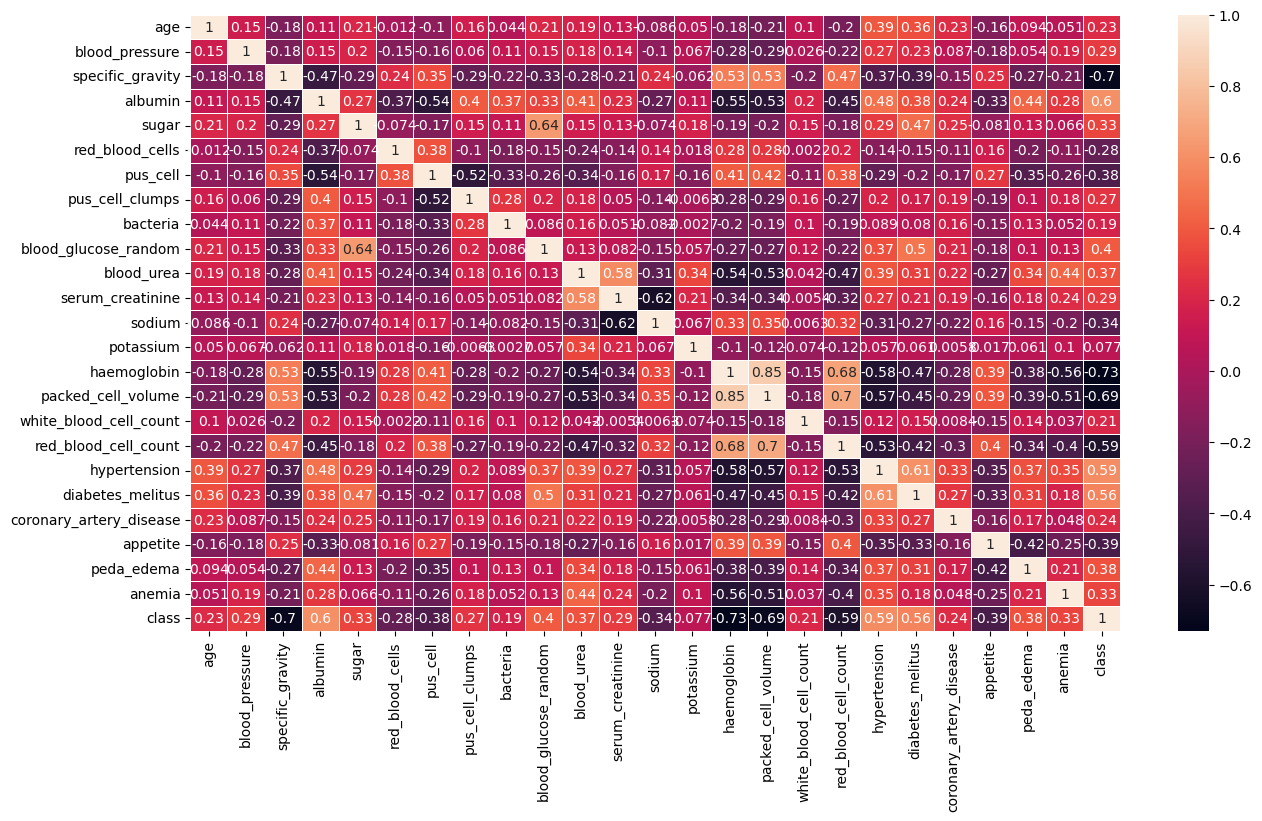

In [121]:
#Co-relation
plt.figure(figsize=(15,8))
sns.heatmap(df_data.corr(), annot=True,linewidth=0.5)
plt.show()

In [120]:
target_corr = df_data.corr()['class'].abs().sort_values(ascending=False)[1:]
target_corr

haemoglobin                0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_melitus           0.559060
blood_glucose_random       0.401374
appetite                   0.393341
pus_cell                   0.375154
peda_edema                 0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anemia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

In [124]:
#Model Building
df_data['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [127]:
x= df_data.drop("class", axis=1)
y= df_data["class"]

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=25)

print(f"'X' shape: {X_train.shape}")
print(f"'xtest' shape: {X_test.shape}")

'X' shape: (300, 24)
'xtest' shape: (100, 24)


In [128]:
#Algorithm
#Decision trees
from sklearn.tree import DecisionTreeClassifier

dct=DecisionTreeClassifier()
dct.fit(X_train,y_train)

DecisionTreeClassifier()

In [129]:
y_pred_dct = dct.predict(X_test)
y_pred_dct

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [132]:
models = []
models.append(('Naive Bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=8)))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('SVM',SVC(kernel='linear')))

In [133]:
#Metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix

In [134]:
for name, model in models:
    print(name, model)
    print()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("confusion: ",confusion_matrix(y_test,y_pred))
    print('\n')
    print("accuracy: ",accuracy_score(y_test,y_pred))
    print('\n')
    print("precision: ",precision_score(y_test,y_pred))
    print('\n')
    print("recall: ",recall_score(y_test,y_pred))
    print('\n')
    print("f1score: ",f1_score(y_test,y_pred))
    print('\n')
    

Naive Bayes GaussianNB()

confusion:  [[37  0]
 [ 5 58]]


accuracy:  0.95


precision:  1.0


recall:  0.9206349206349206


f1score:  0.9586776859504132


KNN KNeighborsClassifier(n_neighbors=8)

confusion:  [[31  6]
 [18 45]]


accuracy:  0.76


precision:  0.8823529411764706


recall:  0.7142857142857143


f1score:  0.7894736842105263


RandomForestClassifier RandomForestClassifier()

confusion:  [[35  2]
 [ 0 63]]


accuracy:  0.98


precision:  0.9692307692307692


recall:  1.0


f1score:  0.984375


DecisionTreeClassifier DecisionTreeClassifier()

confusion:  [[35  2]
 [ 3 60]]


accuracy:  0.95


precision:  0.967741935483871


recall:  0.9523809523809523


f1score:  0.96


SVM SVC(kernel='linear')

confusion:  [[34  3]
 [ 2 61]]


accuracy:  0.95


precision:  0.953125


recall:  0.9682539682539683


f1score:  0.9606299212598425


